In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Optional: if running in an environment that doesn't support inline, use Agg for non-interactive rendering
# import matplotlib
# matplotlib.use('Agg')

print('Matplotlib backend:', plt.get_backend())

Matplotlib backend: inline


Hénon model: 
\begin{align}
    x_{n+1} &= y_n + 1 - ax_n^2\\
    y_{n+1} &= bx_n
\end{align}


In [2]:
def henon_map(a, b, x0, y0, n):
    """
    Generate points of the Henon map
    """
    x, y = x0, y0
    points = np.zeros((n, 2))
    for i in range(n):
        x_new = 1 - a * x**2 + y
        y_new = b * x
        points[i, :] = [x_new, y_new]
        x, y = x_new, y_new
    return points


def plot_henon_map(a, b, x0, y0, n, transitoire):
    """
    Plot the Henon map
    """
    points = henon_map(a, b, x0, y0, n)
    fig, ax = plt.subplots()
    ax.scatter(points[transitoire:, 0], points[transitoire:, 1])
    ax.set_title(f"Henon Map (a={a}, b={b})")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.axis("equal")
    ax.grid(True)
    plt.show()


def plot_bifurcation_diagram(a_values, b, x0, y0, n, last, axis):
    """
    Plot the bifurcation diagram of the Henon map
    """
    fig, ax = plt.subplots()
    if axis == "x":
        for a in a_values:
            points = henon_map(a, b, x0, y0, n)
            ax.scatter([a] * last, points[-last:, 0], s=0.5, c="blue")
    else:
        for a in a_values:
            points = henon_map(a, b, x0, y0, n)
            ax.scatter([a] * last, points[-last:, 1], s=0.5, c="blue")
    ax.set_title(f"Bifurcation Diagram (b={b})")
    ax.set_xlabel("a")
    ax.set_ylabel("x")
    ax.grid(True)
    plt.show()

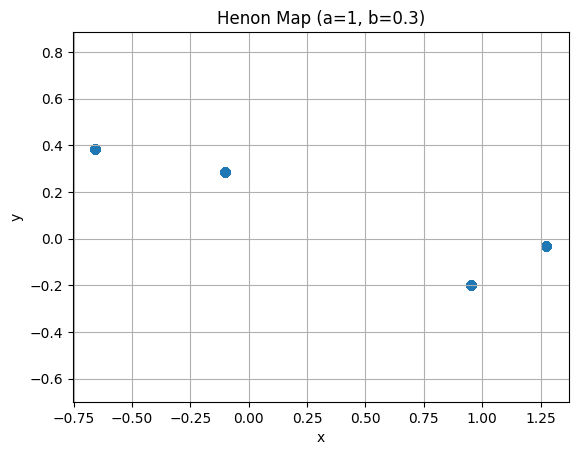

In [6]:
plot_henon_map(a=1, b=0.3, x0=0.1, y0=0.1, n=100000, transitoire=100)

/var/folders/g9/2s_b0h716cdgj18bgy7tjlww0000gn/T/ipykernel_10076/3436512866.py:8: RuntimeWarning: overflow encountered in scalar power
  x_new = 1 - a * x**2 + y


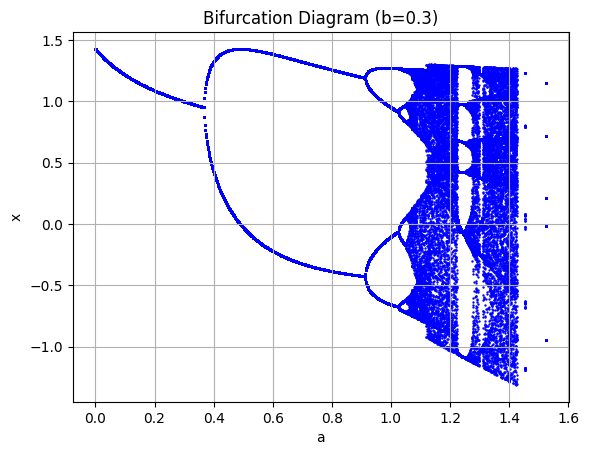

In [5]:
plot_bifurcation_diagram(a_values=np.linspace(0, 1.6, 1000), b=0.3, x0=0.1, y0=0.1, n=10000, last=100, axis="x")

In [7]:
def coupled_henon_map(a, b, c, d, x0, y0, u0, v0, n, Eps):
    """Generate points of the coupled Henon map."""
    x, y = x0, y0
    u, v = u0, v0
    points = np.zeros((n, 2, 2))  # [(x, y, u, v)]
    for i in range(n):
        x_new = 1 - a * ((1 - Eps) * x + Eps * u) ** 2 + ((1 - Eps) * y + Eps * v)
        y_new = b * ((1 - Eps) * x + Eps * u)
        u_new = 1 - c * ((1 - Eps) * u + Eps * x) ** 2 + ((1 - Eps) * v + Eps * y)
        v_new = d * ((1 - Eps) * u + Eps * x)

        points[i, :, :] = [
            [x_new, y_new],
            [u_new, v_new],
        ]  # append((x_new, y_new, u_new, v_new))
        x, y = x_new, y_new
        u, v = u_new, v_new

    return points


def plot_coupled_henon_map(a, b, c, d, x0, y0, u0, v0, n, Eps, transitoire):
    """Plot the coupled Henon map."""
    points = coupled_henon_map(a, b, c, d, x0, y0, u0, v0, n, Eps)
    plt.plot(
        points[transitoire:, 0, 0],
        points[transitoire:, 0, 1],
        "b.",
        markersize=5,
        label="Map 1",
    )
    plt.plot(
        points[transitoire:, 1, 0],
        points[transitoire:, 1, 1],
        "r.",
        markersize=5,
        label="Map 2",
    )
    plt.title(f"Coupled Henon Map (a={a}, b={b}, c={c}, d={d}, Eps={Eps})")
    plt.xlabel("First coordinate")
    plt.ylabel("Second coordinate")
    plt.axis("equal")
    plt.grid(True)
    plt.legend()
    plt.show()

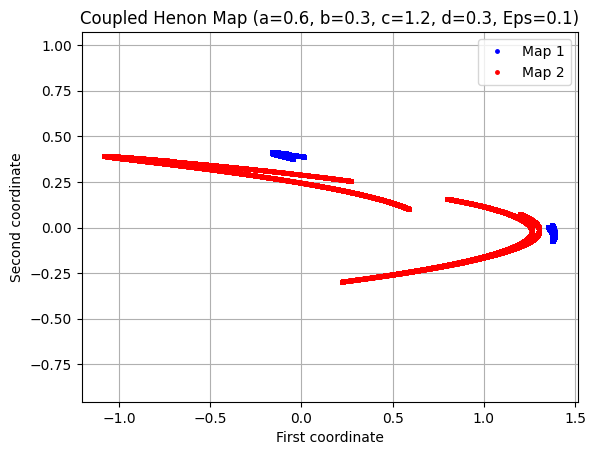

In [9]:
plot_coupled_henon_map(a=0.6, b=0.3,c = 1.2, d = 0.3, x0=0.1, y0=0.1, u0=0.1, v0=0.1, n=100000, Eps=0.1, transitoire=100) 

In [23]:
a = 1.2
b = 0.3
c = 0.3
d = 0.3
x0 = 0.0
y0 = 0.0
u0 = 0.0
v0 = 0.0
n = int(1e5)
points_gardes = 1000
transitoire = 100
Eps = [0.1, 0.2, 0.3, 0.4, 0.5]

In [ ]:
def coupling_sum(x, y, delta):
    """Return the average sum wrt a certain coupling value"""
    assert 0 < delta < 1, "wrong coupling"
    return (1 - delta) * x + delta * y


def coupled_henon_wrt_coupling(a, b, c, d, x0, y0, u0, v0, n, Eps, points_gardes):
    """Compute the coupled Henon maps for several coupling strengths Eps.
    Returns an array of shape (points_gardes, 2, num_couplings) where axis 0=time, axis1=(x,y), axis2=coupling index

    be aware that it returns the coupled variables
    """
    p = len(Eps)
    points = np.zeros((points_gardes, 2, p))
    all_points = np.zeros((points_gardes, 2, 2, p))
    for i in range(p):
        all_points[:, :, :, i] = coupled_henon_map(
            a, b, c, d, x0, y0, u0, v0, n, Eps[i]
        )[-points_gardes:, :, :]
        points = coupling_sum(all_points[:, 0, :, :], all_points[:, 1, :, :], Eps[i])
    return points

In [25]:
simu = coupled_henon_wrt_coupling(a, b, c, d, x0, y0, u0, v0, n, Eps, points_gardes)
print('simu shape:', np.shape(simu))

simu shape: (1000, 2, 5)


In [26]:
print(np.shape(list(simu[:,0,0])))

(1000,)


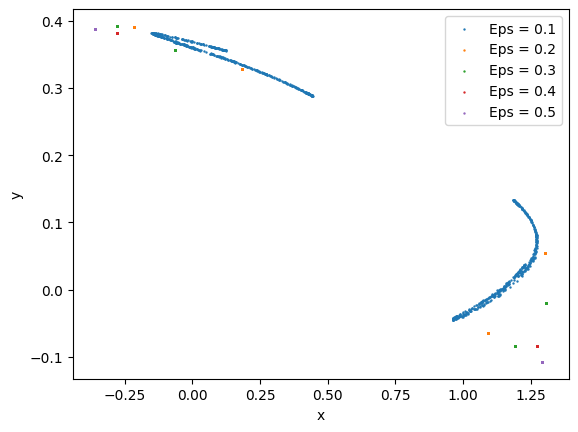

In [27]:
fig, ax = plt.subplots()
for i in range(len(Eps)):
    ax.scatter(simu[:,0,i], simu[:,1,i], s=0.5, label=f"Eps = {Eps[i]}")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.legend()
plt.show()

détecter un régime périodique ou chaotique : pour un régime périodique le nombre de points stables différents est un multiple de 2

In [44]:
def count(data, axis:str):
    if axis =="x": 
        p=(0, 0) 
    elif axis =="y":
        p = (0, 1)
    elif axis =="u":
        p= (1, 0)
    elif axis =="v":
        p = (1, 1)
    else: 
        return "axis not existent"
    simu = np.sort(data[: ,p[0], p[1], :], axis=0)
    k = len(simu[0])
    nb_points = [1]*k
    for i in range(k):
        start = simu[0, i]
        for j in range(1,len(simu)):
            if simu[j,i] != start:
                nb_points[i] += 1 
                start = simu[j,i]
            else:   
                None 
    return nb_points

In [37]:
def full_points(a, b, c, d, x0, y0, u0, v0, n, Eps, points_gardes):
    p = len(Eps)
    all_points = np.zeros((points_gardes, 2, 2, p))
    for i in range(p):
        all_points[:, :, :, i] = coupled_henon_map(
            a, b, c, d, x0, y0, u0, v0, n, Eps[i]
        )[-points_gardes:, :, :]
    return all_points

In [45]:
full_data = full_points(a, b, c, d, x0, y0, u0, v0, n, Eps, points_gardes)

In [39]:
print(full_data[:,0,0,2])

[ 0.98664644 -0.59563394  1.25548211 -1.03228212  0.98664644 -0.59563394
  1.25548211 -1.03228212  0.98664644 -0.59563394  1.25548211 -1.03228212
  0.98664644 -0.59563394  1.25548211 -1.03228212  0.98664644 -0.59563394
  1.25548211 -1.03228212  0.98664644 -0.59563394  1.25548211 -1.03228212
  0.98664644 -0.59563394  1.25548211 -1.03228212  0.98664644 -0.59563394
  1.25548211 -1.03228212  0.98664644 -0.59563394  1.25548211 -1.03228212
  0.98664644 -0.59563394  1.25548211 -1.03228212  0.98664644 -0.59563394
  1.25548211 -1.03228212  0.98664644 -0.59563394  1.25548211 -1.03228212
  0.98664644 -0.59563394  1.25548211 -1.03228212  0.98664644 -0.59563394
  1.25548211 -1.03228212  0.98664644 -0.59563394  1.25548211 -1.03228212
  0.98664644 -0.59563394  1.25548211 -1.03228212  0.98664644 -0.59563394
  1.25548211 -1.03228212  0.98664644 -0.59563394  1.25548211 -1.03228212
  0.98664644 -0.59563394  1.25548211 -1.03228212  0.98664644 -0.59563394
  1.25548211 -1.03228212  0.98664644 -0.59563394  1

In [46]:
count(full_data, "x")

[1000, 11, 4, 9, 2]

Pour savoir si nombre de période discret ou continu il suffit de compter selon une des deux dimensions

In [48]:
rng = np.random.default_rng(12345)

In [ ]:
Epsilon = rng.uniform(0, 1, 100)

In [78]:
Epsilon = np.abs(rng.normal(0.15, 1e-2, 1000))

In [79]:
data = full_points(a, b, c, d, x0, y0, u0, v0, n, Epsilon, points_gardes)
u_counting = count(data, "u")
x_counting = count(data, "x")

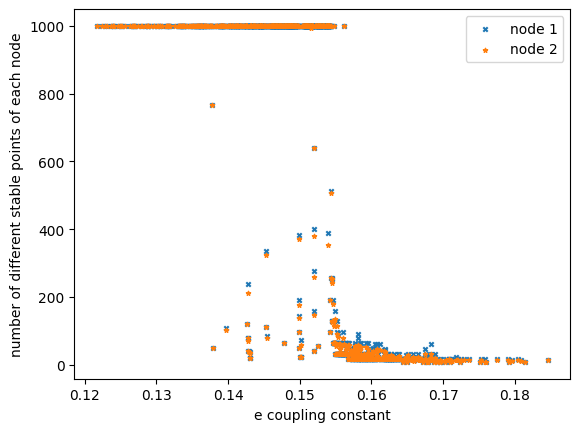

In [80]:
fig, ax = plt.subplots()
ax.scatter(Epsilon, x_counting, label="node 1",marker="x", s=10)
ax.scatter(Epsilon, u_counting, label="node 2", marker="*", s=10)
ax.set_xlabel("e coupling constant")
ax.set_ylabel("number of different stable points of each node")
plt.legend()
plt.show()